# DDN

In [1]:
!pip install --upgrade --no-cache-dir gdown

# !gdown 1Foy57BMvQe4GOcZr1g0lmdFXvmQ1lEVy
# !unzip /content/file.zip

!gdown 1yEx6oREp6eHj1ASg4nTf1ynvEG7RUymf

!gdown 1WA5WUH9ueU1stupYueiju2ghquW2lpyW
!gdown 12QyksJjmwP5oHXh-4D-XZQjiQ6FLCDN4

  Attempting uninstall: gdown
    Found existing installation: gdown 4.6.6
    Uninstalling gdown-4.6.6:
      Successfully uninstalled gdown-4.6.6
Downloading...
From (uriginal): https://drive.google.com/uc?id=1yEx6oREp6eHj1ASg4nTf1ynvEG7RUymf
From (redirected): https://drive.google.com/uc?id=1yEx6oREp6eHj1ASg4nTf1ynvEG7RUymf&confirm=t&uuid=3061e6c2-5f89-48d8-8e0d-7d96ccb9e80e
To: /content/VGG_Without_BN.pth
100% 59.0M/59.0M [00:01<00:00, 30.9MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=1WA5WUH9ueU1stupYueiju2ghquW2lpyW
From (redirected): https://drive.google.com/uc?id=1WA5WUH9ueU1stupYueiju2ghquW2lpyW&confirm=t&uuid=4ff3a8a3-7951-4f5a-a4e1-aaa95122ec7b
To: /content/test.py
100% 4.82k/4.82k [00:00<00:00, 15.7MB/s]
Downloading...
From (uriginal): https://drive.google.com/uc?id=12QyksJjmwP5oHXh-4D-XZQjiQ6FLCDN4
From (redirected): https://drive.google.com/uc?id=12QyksJjmwP5oHXh-4D-XZQjiQ6FLCDN4&confirm=t&uuid=ed5e2d73-90b6-43e4-a68e-00921d674bea
To: /content/vgg.p

In [2]:
pip install git+https://github.com/jeromerony/fast_adversarial

  Cloning https://github.com/jeromerony/fast_adversarial to /tmp/pip-req-build-_9wmz6ea
  Running command git clone --filter=blob:none --quiet https://github.com/jeromerony/fast_adversarial /tmp/pip-req-build-_9wmz6ea
  Resolved https://github.com/jeromerony/fast_adversarial to commit 45210b7c79e2deaeac9845d6c901dc2580d6e316
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 85.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 10.5 MB/s eta 0:00:00
  Created wheel for fast-adversarial: filename=fast_adversarial-0.1-py3-none-any.whl size=29326 sha256=053ae40c9e27d9ca774b28f9d2f9a59798b383a339172636eccdb7dda4ca90e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-xk70tq_z/wheels/d6/68/b8/b4ae3dd5ec7d260836ef6dbd5402

# VGG_Without_BN

In [3]:
import argparse
import torch
import time
from torch.utils import data
from torchvision import datasets, transforms
from torchvision.utils import save_image, make_grid
import warnings
warnings.filterwarnings('ignore')
from vgg import VGG
from fast_adv.attacks import DDN, CarliniWagnerL2
from fast_adv.utils import requires_grad_, l2_norm
import matplotlib.pyplot as plt
import os
%matplotlib inline

torch.manual_seed(42)
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
data_path = 'data/cifar10'  # Change this if you already downloaded CIFAR-10 elsewhere
model_path = '/content/VGG_Without_BN.pth'  # Specify the path to your model file

100%|██████████| 170498071/170498071 [00:02<00:00, 84339237.13it/s]


Extracting data/cifar10/cifar-10-python.tar.gz to data/cifar10


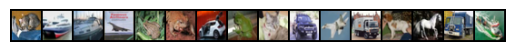

In [4]:
# Loading the data
dataset = datasets.CIFAR10(data_path, train=False,
                         transform=transforms.ToTensor(),
                         download=True)
loader = data.DataLoader(dataset, shuffle=False, batch_size=16)

x, y = next(iter(loader))
x = x.to(device)
y = y.to(device)

x_cpu = x.cpu()
grid_image = make_grid(x_cpu, nrow=16).permute(1, 2, 0)
plt.imshow(grid_image)
plt.axis('off')
plt.show()


In [5]:
import torch
import torch.nn as nn

print('Loading model')

if not os.path.exists(model_path):
    import urllib
    print('Downloading model')
    urllib.request.urlretrieve(model_url, model_path)


model = VGG(vgg_name='VGG16', pretrained=True)
model = nn.DataParallel(model)
checkpoint = torch.load(r"/content/VGG_Without_BN.pth")
# model.load_state_dict(torch.load(model_path))
model.load_state_dict(checkpoint['net'])
model.eval().to(device)
requires_grad_(model, False)

Loading model


Running DDN 100 attack
Completed in 7.74s


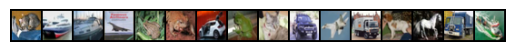

In [6]:
print('Running DDN 100 attack')
attacker = DDN(steps=100, device=device)
start = time.time()
ddn_atk = attacker.attack(model, x, labels=y, targeted=False)
ddn_time = time.time() - start
print('Completed in {:.2f}s'.format(ddn_time))

plt.imshow(make_grid(ddn_atk.cpu(), nrow=16).permute(1, 2, 0))
plt.axis('off');

Running C&W 4 x 25 attack (limited to 100 iterations)
Completed in 0.23s


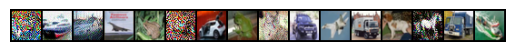

In [15]:
print('Running C&W 4 x 25 attack (limited to 100 iterations)')
cwattacker100 = CarliniWagnerL2(device=device,
                             image_constraints=(0, 1),
                             num_classes=10,
                             search_steps=4,
                             max_iterations=25,
                             learning_rate=0.5,
                             initial_const=1.0)

start = time.time()
cw100_atk = cwattacker100.attack(model, x, labels=y, targeted=False)
cw100_time = time.time() - start
print('Completed in {:.2f}s'.format(cw100_time))

plt.imshow(make_grid(cw100_atk.cpu(), nrow=16).permute(1,2,0))
plt.axis('off');

Running C&W 9 x 10000 attack
Completed in 262.83s


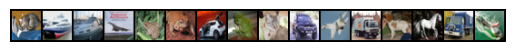

In [16]:
print('Running C&W 9 x 10000 attack')
cwattacker = CarliniWagnerL2(device=device,
                             image_constraints=(0, 1),
                             num_classes=10)

start = time.time()
cw_atk = cwattacker.attack(model, x, labels=y, targeted=False)
cw_time = time.time() - start
print('Completed in {:.2f}s'.format(cw_time))

plt.imshow(make_grid(cw_atk.cpu(), nrow=16).permute(1,2,0))
plt.axis('off');

C&W 4 x 25 done in 0.2s: Success: 100.00%, Mean L2: 3.2841, Median L2: 0.0000.
C&W 9 x 10000 done in 262.8s: Success: 100.00%, Mean L2: 0.0756, Median L2: 0.0000.
DDN 100 done in 7.7s: Success: 100.00%, Mean L2: 0.0675, Median L2: 0.0319.

Figure: top row: original images; 2nd: C&W 4x25 atk; 3rd: C&W 9x10000 atk; 4th: DDN 100 atk


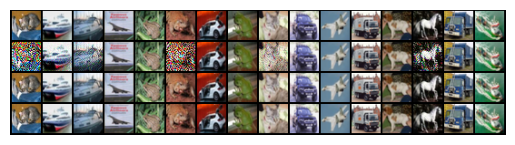

In [17]:
all_imgs = torch.cat((x, cw100_atk, cw_atk, ddn_atk))
img_grid = make_grid(all_imgs, nrow=16, pad_value=0)
plt.imshow(img_grid.cpu().permute(1, 2, 0))
plt.axis('off')

# Print metrics
pred_orig = model(x).argmax(dim=1).cpu()
pred_cw = model(cw_atk).argmax(dim=1).cpu()
pred_cw100 = model(cw100_atk).argmax(dim=1).cpu()
pred_ddn = model(ddn_atk).argmax(dim=1).cpu()
print('C&W 4 x 25 done in {:.1f}s: Success: {:.2f}%, Mean L2: {:.4f}, Median L2: {:.4f}.'.format(
cw100_time,
(pred_cw100 != y.cpu()).float().mean().item() * 100,
l2_norm(cw100_atk - x).mean().item(),
l2_norm(cw100_atk - x).median().item()
))
print('C&W 9 x 10000 done in {:.1f}s: Success: {:.2f}%, Mean L2: {:.4f}, Median L2: {:.4f}.'.format(
cw_time,
(pred_cw != y.cpu()).float().mean().item() * 100,
l2_norm(cw_atk - x).mean().item(),
l2_norm(cw_atk - x).median().item()
))
print('DDN 100 done in {:.1f}s: Success: {:.2f}%, Mean L2: {:.4f}, Median L2: {:.4f}.'.format(
ddn_time,
(pred_ddn != y.cpu()).float().mean().item() * 100,
l2_norm(ddn_atk - x).mean().item(),
l2_norm(ddn_atk - x).median().item()
))
print()
print('Figure: top row: original images; 2nd: C&W 4x25 atk; 3rd: C&W 9x10000 atk; 4th: DDN 100 atk')



```
C&W 4 x 25 done in 0.2s: Success: 100.00%, Mean L2: 2.4371.
C&W 9 x 10000 done in 256.5s: Success: 100.00%, Mean L2: 0.0625.
DDN 100 done in 7.3s: Success: 100.00%, Mean L2: 0.0623.
```



# AA

In [ ]:
pip install git+https://github.com/fra31/auto-attack

  Cloning https://github.com/fra31/auto-attack to /tmp/pip-req-build-6jyiyuuq
  Running command git clone --filter=blob:none --quiet https://github.com/fra31/auto-attack /tmp/pip-req-build-6jyiyuuq
  Resolved https://github.com/fra31/auto-attack to commit a39220048b3c9f2cca9a4d3a54604793c68eca7e
  Preparing metadata (setup.py) ... done
  Created wheel for autoattack: filename=autoattack-0.1-py3-none-any.whl size=36229 sha256=18a148a272c9dd852f71e3b942c7b6eac207f8227db62a07e67d37c0936e1f71
  Stored in directory: /tmp/pip-ephem-wheel-cache-7ka0ipet/wheels/b7/17/95/4b16fafe1b84fdabd247eb5f01b41165bd98d4c82d64ab93d2
Successfully built autoattack


In [ ]:
pip install git+https://github.com/RobustBench/robustbench

  Cloning https://github.com/RobustBench/robustbench to /tmp/pip-req-build-zcirv7a6
  Running command git clone --filter=blob:none --quiet https://github.com/RobustBench/robustbench /tmp/pip-req-build-zcirv7a6
  Resolved https://github.com/RobustBench/robustbench to commit ec26a6cd0b0812135270c3659caabcab80701b15
  Preparing metadata (setup.py) ... done
  Cloning https://github.com/fra31/auto-attack.git (to revision a39220048b3c9f2cca9a4d3a54604793c68eca7e) to /tmp/pip-install-1bj1x3e5/autoattack_609ca5ca93df4ede8bc16d38af710b07
  Running command git clone --filter=blob:none --quiet https://github.com/fra31/auto-attack.git /tmp/pip-install-1bj1x3e5/autoattack_609ca5ca93df4ede8bc16d38af710b07
  Running command git rev-parse -q --verify 'sha^a39220048b3c9f2cca9a4d3a54604793c68eca7e'
  Running command git fetch -q https://github.com/fra31/auto-attack.git a39220048b3c9f2cca9a4d3a54604793c68eca7e
  Resolved https://github.com/fra31/auto-attack.git to commit a39220048b3c9f2cca9a4d3a54604793c

In [ ]:
from robustbench.data import load_cifar10
x_test, y_test = load_cifar10(n_examples=50)

from robustbench.utils import load_model
model = VGG(vgg_name='VGG16', pretrained=True)
model = nn.DataParallel(model)
checkpoint = torch.load(r"/content/Normal_VGG.pth")
# model.load_state_dict(torch.load(model_path))
model.load_state_dict(checkpoint['net'])
model.eval().to(device)
requires_grad_(model, False)

Files already downloaded and verified


In [ ]:
!pip install -q foolbox  # produces 2 incompatibility messages, but they can be just ignored
import foolbox as fb

model_fb = fb.PyTorchModel(model, bounds=(0, 1))
_, advs, success = fb.attacks.LinfPGD(rel_stepsize=0.1, steps=20)(model_fb, x_test.to('cuda'), y_test.to('cuda'), epsilons=[8/255])
print('Robust accuracy: {:.1%}'.format(1 - success.float().mean()))

Robust accuracy: 0.0%


In [ ]:
import warnings
warnings.filterwarnings('ignore')
!pip install -q git+https://github.com/RobustBench/robustbench.git@2d630bc9e8d1cf50d46a4dda65fd36850e3ef769

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done


In [ ]:
import torch

# Load the model from the .pth file
model_path = '/content/Normal_VGG.pth'
model = torch.load(model_path)

# Save the model in the .pt format
output_path = '/content/Normal_VGG.pt'
torch.save(model, output_path)

print(f"Conversion completed. Model saved as '{output_path}'.")


Conversion completed. Model saved as '/content/Normal_VGG.pt'.


In [ ]:
from robustbench.data import load_cifar10
x_test, y_test = load_cifar10(n_examples=50)

from robustbench.utils import load_model
model = VGG(vgg_name='VGG16', pretrained=True)
model = nn.DataParallel(model)
checkpoint = torch.load(r"/content/Normal_VGG.pt")
# model.load_state_dict(torch.load(model_path))
model.load_state_dict(checkpoint['net'])
model.eval().to(device)
requires_grad_(model, False)

Files already downloaded and verified


In [ ]:
!pip install -q foolbox  # produces 2 incompatibility messages, but they can be just ignored
import foolbox as fb

model_fb = fb.PyTorchModel(model, bounds=(0, 1))
_, advs, success = fb.attacks.LinfPGD(rel_stepsize=0.1, steps=20)(model_fb, x_test.to('cuda'), y_test.to('cuda'), epsilons=[8/255])
print('Robust accuracy: {:.1%}'.format(1 - success.float().mean()))

Robust accuracy: 2.0%


In [ ]:
from autoattack import AutoAttack
adversary = AutoAttack(model, norm='L2', eps=0.5, version='standard')

setting parameters for standard version


Files already downloaded and verified


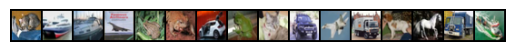

In [ ]:
# Loading the data
dataset = datasets.CIFAR10(data_path, train=False,
                         transform=transforms.ToTensor(),
                         download=True)
loader = data.DataLoader(dataset, shuffle=False, batch_size=16)

x, y = next(iter(loader))
x = x.to(device)
y = y.to(device)

x_cpu = x.cpu()
grid_image = make_grid(x_cpu, nrow=16).permute(1, 2, 0)
plt.imshow(grid_image)
plt.axis('off')
plt.show()


In [ ]:
x_adv = adversary.run_standard_evaluation(x, y, bs=16)

using standard version including apgd-ce, apgd-t, fab-t, square.
initial accuracy: 0.00%
max L2 perturbation: 0.00000, nan in tensor: 0, max: 1.00000, min: 0.00000
robust accuracy: 0.00%
